## Executive Summary

The first step for analysis of the dataset was loading in the parts that were needed for a more in-depth look at them. Initially, the files were loaded in one-by-one by filename and then each file was split up by line to find the desired features. The features that I decided to explore and clean were each book's author, total/unique words, number of sentences, title length, and average sentiment. With all these features, I looked for trends in their data by plotting them in a variety of ways. Using the plots, I came up with three questions to explore this feature data. I then found the answers to be that a book's total words and unique words are correlated, book length and average sentiment are not correlated, and the most published authors have a title length of around 35. But to better answer these questions and developed other questions and data from the next there are some aspects of the dataset that could be improved. The inclusion of each book's genre and definitive start and end points, as well as the inclusion of more diverse set of book languages are my suggestions to improve the dataset and analysis of it.

## Data Cleaning and Preparations

In [1]:
#importing the modules I think I'll be using for analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

### Loading in the dataset

In [2]:
#code cell with example of how to read in all of the .txt files in the dataset folder
import os             
path = '/Users/matthewsenseman/Desktop/RepManData/dataset' #path where I have the files at

print('This code block is an example of how the txt files are loaded in.')

for filename in os.listdir(path)[:5]: #only displaying the first 5 files
    if filename != '.ipynb_checkpoints': # I don't know why this was in folder but also can't delete it?
        with open(filename,encoding="utf8", errors='ignore') as fid: #was getting error without encoding = 'utf8'
            print(filename)
            
#check Reference [1] for how I found how to do this.

This code block is an example of how the txt files are loaded in.
11303.txt
11465.txt
11471.txt
10009.txt
10021.txt


### Chosen Features (with examples)

In [3]:
#Number of unique authors
authors = []
for filename in os.listdir(path):
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
            for i in file: #going line by line to find the author names (should be in first ~25 lines)
                if 'Author: ' in i: #this is how all the books have author listed
                    authors.append(i[7:].strip()) #removing white space from beginning/end of names
print(f'There are {len(set(authors))} unique authors in the dataset.') #using set() to get unique names

There are 679 unique authors in the dataset.


In [4]:
#Total words in each book
beginning_index = [] #used for every starting index of the text
ending_index = [] #used for every ending index of the text
tot_words = [] #total words in each book

#load in the desired text files
for filename in os.listdir(path)[:100]: #only going to use the first 100 files so my computer doesn't explode
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
#find the start and end of each text, then create 'new' text from desired start and end
            for i in file:
                if ('***START OF THE PROJECT GUTENBERG EBOOK' in i): #indicates beginning of book
                    beginning_index.append(file.index(i))
                elif ('***END OF THE PROJECT GUTENBERG EBOOK' in i): #indicates end of book
                    ending_index.append(file.index(i))
            for i,j in zip(beginning_index,ending_index):
                file_new = ''.join(file[i+1:j]) #removes any text outside the book and makes it a 'new' book file
            words = file_new.split() #split text to find all words
            tot_words.append(len(words))
print(f'There are {tot_words[0]} total words in 11303.txt.')

There are 57478 total words in 11303.txt.


In [5]:
#Unique words in each book
beginning_index = [] #used for every starting index of the text
ending_index = [] #used for every ending index of the text
unique_words = []
#load in the desired text files
for filename in os.listdir(path)[:100]: #only going to use the first 100 files so my computer doesn't explode
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
#find the start and end of each text, then create 'new' text from desired start and end
            for i in file:
                if ('***START OF THE PROJECT GUTENBERG EBOOK' in i): #indicates beginning of book
                    beginning_index.append(file.index(i))
                elif ('***END OF THE PROJECT GUTENBERG EBOOK' in i): #indicates end of book
                    ending_index.append(file.index(i))
            for i,j in zip(beginning_index,ending_index):
                file_new = ''.join(file[i+1:j]) #removes any text outside the book and makes it a 'new' file
            words = file_new.split() #split text to find all words
            unique_words.append(len(set(words))) #uses set() to find unique words
print(f'There are {unique_words[0]} unique words in 11303.txt.')

There are 9581 unique words in 11303.txt.


In [6]:
#Number of sentences in each book
beginning_index = [] #used for every starting index of the text
ending_index = [] #used for every ending index of the text
tot_sentences = [] #number of sentences
files = [] #list of all filenames

#load in the desired text files
for filename in os.listdir(path)[:50]: #uses first 50 so my computer doesn't explode
    files.append(filename) #saving all files used in a list
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
#find the start and end of each text, then create 'new' text from desired start and end
            for i in file:
                if ('***START OF THE PROJECT GUTENBERG EBOOK' in i): #indicates beginning of book
                    beginning_index.append(file.index(i))
                elif ('***END OF THE PROJECT GUTENBERG EBOOK' in i): #indicates end of book
                    ending_index.append(file.index(i))
            for i,j in zip(beginning_index,ending_index):
                file_new = ''.join(file[i+1:j]) #removes any text outside the book and makes it a 'new' file
            sentences = file_new.replace('?','.').replace('!','.') #for uniform sentence finding
            sentences = sentences.split('.')
            tot_sentences.append(len(sentences))
print(f'There are {tot_sentences[0]} sentences in {files[0]}')

There are 4284 sentences in 11303.txt


In [7]:
#Title lengths (in total characters)
org_titles = [] #original titles
titles = [] #titles stripped of spaces
title_lengths = []
for filename in os.listdir(path):
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
            for i in file:
                if 'Title:' in i:
                    org_title = i[6:].strip() #stripping ending white space but keeping space between words
                    org_titles.append(org_title)
                    
                    title = i[6:].strip().replace(' ','') #removing spaces between words
                    titles.append(title) 
                    title_lengths.append(len(title))
print(f'An example of a book title: "{titles[0]}" with length of {title_lengths[0]}.')

An example of a book title: "VainFortune" with length of 11.


In [8]:
#Example of sentiment analysis of a book
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiments = {} #dict to add each filename and sentence score to
beginning_index = []
ending_index = []

#load in the desired text files
for filename in os.listdir(path)[:50]: #first 50 so my computer doesn't explode (even 50 takes awhile)
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
#find the start and end of each text, then create 'new' text from desired start and end lines
            for i in file:
                if ('***START OF THE PROJECT GUTENBERG EBOOK' in i): #start of actual book
                    beginning_index.append(file.index(i))
                elif ('***END OF THE PROJECT GUTENBERG EBOOK' in i): #end of actual book
                    ending_index.append(file.index(i))
            for i,j in zip(beginning_index,ending_index):
                file_new = ''.join(file[i+1:j]) #creating new file of just the book text
                
#tokenize sentences
                nltk_sentences = nltk.tokenize.sent_tokenize(file_new) #tokenize all sentences in the books
            comp_scores = [] #compound scores outputted by sentiment analysis
        
#re-replace newline characters
            for sentence in nltk_sentences:
                sentence = sentence.replace('\n', ' ') #removes newline characters from all tokenized sentences
            
#use sentiment analysis, narrow down to compound scores
                score = analyser.polarity_scores(sentence) #finds sentiment scores for each sentence
                comp_scores.append(score['compound']) #only taking compound score for each sentence
        
#display the average compound score for each file
            average_comp_score = sum(comp_scores)/len(comp_scores) #average comp score per text
            sentiments[filename] = average_comp_score
print(f'The average sentence polarity compound score for 11303.txt is {sentiments["11303.txt"]}.')

The average sentence polarity compound score for 11303.txt is 0.05061575324331494.


### Note about values used in chosen features

The largest issue when using the actual "book" that is contained in all of the data files is the existence of typical book features such as table of contents, bibliographies, publishing company, etc. Not all of the included books have these features, and those that do have one of the features are likely to have one of a different length than the other books. Because of this fact, it is nearly impossible to determine the start and end of each book without going through them one by one. That is why in the code above the start and ending points used in the books is:

***'START OF THE PROJECT GUTENBERG EBOOK'***

***'END OF THE PROJECT GUTENBERG EBOOK'***

Note that I also encountered a variation of these start and end points that replace ***THE*** with ***THIS***.
But I decided not to use these in the data, just keeping the first variations. This standardized and greatly simplified the process for extracting the book out of the text file. Because of this issue with the data, the features using this method will have slightly skewed data and are not exact.

### Basic info about the dataset

In [9]:
#Print out some basic info about the dataset. E.g.:
#Number of files
count = 0
for filename in os.listdir(path):
    if filename != '.ipynb_checkpoints':
        count+=1
print(f'The number of files in the dataset is {count}.')

The number of files in the dataset is 1178.


### Number of features, types, and lengths

There are 6 features that were loaded in, cleaned, and will be used for analysis of the dataset.

In [10]:
#types of the features
print(f'The unique authors feature is of data type {type(authors)}.')
print(f'The total words feature is of data type {type(tot_words)}.')
print(f'The unique words feature is of data type {type(unique_words)}.')
print(f'The total sentences feature is of data type {type(tot_sentences)}.')
print(f'The titles/title lengths feature is of data type {type(titles)}.')
print(f'The sentiments feature is of data type {type(sentiments)}.')

The unique authors feature is of data type <class 'list'>.
The total words feature is of data type <class 'list'>.
The unique words feature is of data type <class 'list'>.
The total sentences feature is of data type <class 'list'>.
The titles/title lengths feature is of data type <class 'list'>.
The sentiments feature is of data type <class 'dict'>.


In [11]:
#lengths of the features
print(f'The unique authors feature is of length {len(set(authors))}.')
#note: The total authors number is higher than the total file number, 
#meaning 'Author:' is in multiple places in some texts
print(f'The total words feature is of length {len(tot_words)}.')
print(f'The unique words feature is of length {len(unique_words)}.')
print(f'The total sentences feature is of length {len(tot_sentences)}.')
print(f'The titles/title lengths feature is of length {len(titles)}.')
#note: This number is higher than the total file number, meaning 'Title:' is in multiple places in some texts
print(f'The sentiments feature is of length {len(sentiments)}.')

The unique authors feature is of length 679.
The total words feature is of length 100.
The unique words feature is of length 100.
The total sentences feature is of length 50.
The titles/title lengths feature is of length 1182.
The sentiments feature is of length 50.


## Exploratory Data Analysis

### Graphs of the Features

#### Let's try plotting total words and unique words together

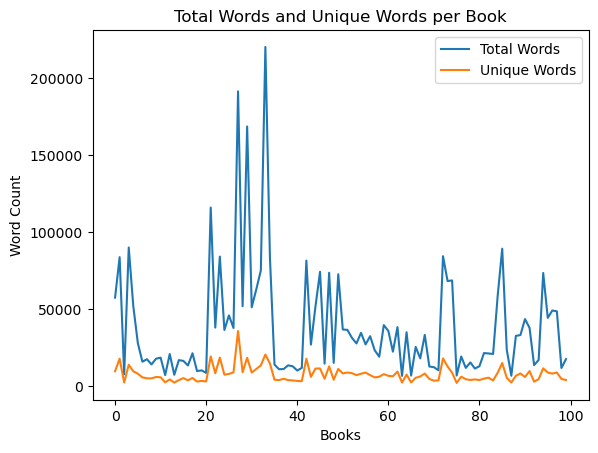

In [12]:
#total words plotted with unique words
plt.plot(tot_words,label='Total Words')
plt.plot(unique_words,label='Unique Words')
plt.title('Total Words and Unique Words per Book')
plt.xlabel('Books')
plt.ylabel('Word Count')
plt.legend()
plt.show()

If we look at the peaks and troughs of the graph, there seems to be some sort of correlation between our two variables. That potential relationship can be looked at in the descriptive analytics section.

#### Let's look at the average sentiment of each book and how many sentences are in each

In [13]:
#Book's average sentiment and the number of sentences
#creates Pandas dataframe for displaying table
df_sent = pd.DataFrame({'Filename' : sentiments.keys(), 'Sentence Count' : tot_sentences,
                        'Average Sentiment': sentiments.values()}) 
df_sent[:10]

,Filename,Sentence Count,Average Sentiment
0,11303.txt,4284,0.050616
1,11465.txt,4887,0.103381
2,11471.txt,538,0.088203
3,10009.txt,3596,0.142349
4,10021.txt,4945,0.113191
5,10747.txt,3575,0.066232
6,11459.txt,816,0.144995
7,10753.txt,823,0.130761
8,10035.txt,840,0.095687
9,10960.txt,904,0.080252


It would be interesting to look for a relationship bewtween the sentiment of a book and its length. Unfortunately I can only use a small number of the books for this analysis because my computer can't handle the sentiment analysis of such long texts.

#### Do the title lengths vary a lot?

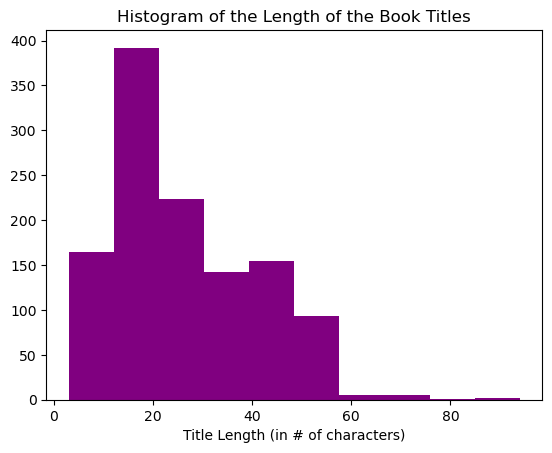

In [14]:
#plotting histogram of titles
plt.hist(title_lengths,color='purple')
plt.title('Histogram of the Length of the Book Titles')
plt.xlabel('Title Length (in # of characters)')
plt.show()

Most of the texts have fairly short titles with a few exceptions. This distribution also isn't quite normally distributed, but perhaps this is due to repeated authors in the dataset tending to write longer/shorter titles for their works.

#### A brief glance at how many unique authors exist in the dataset

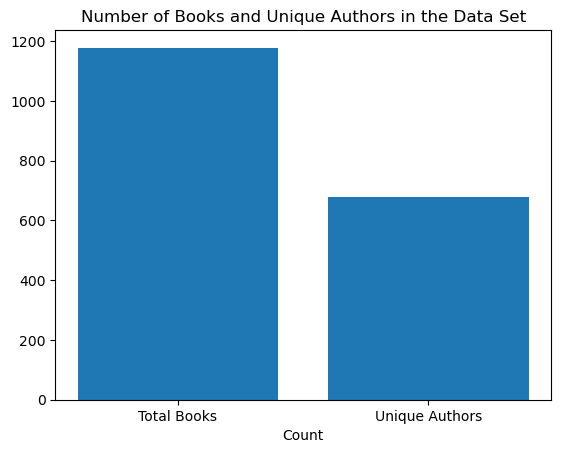

In [15]:
#total books vs unique authors
plt.bar(['Total Books','Unique Authors'],[len(authors),len(set(authors))])
plt.title('Number of Books and Unique Authors in the Data Set')
plt.xlabel('Count')
plt.show()

Based on the plot above, their must be a significant amount of books that were written by the same author. This could be explored further by seeing who has written the most in the dataset.

#### What are the top 10 most common authors in the dataset?

In [16]:
#getting the top 10 authors in the dataset
author_counts = {} #for storing names of top 10 authors and their number of books written
for i in authors:
    count = authors.count(i) #iterating through the list of authors from when the feature was loaded in
    author_counts[i] = count #counts how many times the author shows up in the aforementioned list
top10 = sorted(author_counts.values(),reverse=True)[:10] #See reference [2]
top10_names = sorted(author_counts,key=author_counts.get,reverse=True)[:10] #See reference [2]
for i in range(10):
    print(f'{top10_names[i]}:{top10[i]}')

Various:201
W.W. Jacobs:52
Anonymous:30
Roger McGuinn:30
John Lord:14
Charles Kingsley:14
Unknown:11
James D. Richardson:8
Richard Le Gallienne:7
Arthur Schopenhauer:7


### After visualizing the features, what questions can be asked about them?

#### Question 1.  Is there a quantifiable relationship between the number of unique words vs total words in the books?

#### Question 2. Is there a trend in the overall sentiment of each book vs the length of the book (in # of sentences)?

#### Question 3. What is the average title length of the 10 most frequent authors in the dataset?

## Descriptive Analytics

### Is there a quantifiable relationship between the number of unique words vs total words in the books?
It would be interesting to see if there is a relationship between these values because it could mean a few things. One being if there is a positive relationship between the values then the longer the book, the more topics covered by the book. Basically, longer books are generated by more new ideas and therefore generate new vocabulary to elaborate on those ideas. Another result of a positive relationship between the word values could prove that the authors who write longer books have a better grasp on lexicon and vocabulary, allowing them to develop their book with a diverse word set. Both of these would be interesting conclusions if the data supports them.

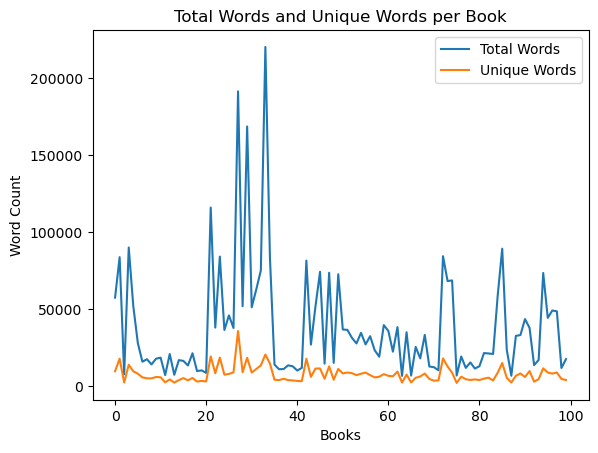

In [17]:
#re-plotting the graph of the words vs unique words
plt.plot(tot_words,label='Total Words')
plt.plot(unique_words,label='Unique Words')
plt.title('Total Words and Unique Words per Book')
plt.xlabel('Books')
plt.ylabel('Word Count')
plt.legend()
plt.show()

In [18]:
#using Pearson's r correlation test to determine a singificant relationship between the values
from scipy.stats import pearsonr #found using reference [3] in Bibliography
pearsonr(tot_words,unique_words)

(0.920503004097743, 8.809160690645035e-42)

The first value above is the correlation coefficient, a number between +1 and -1, with +1 being perfect positive correlation and -1 being perfect negative correlation. The value we obtained from our data was ***~.92***, meaning we have a ***very strong positive correlation*** between the total number of words and the number of unique words in the books.

Our second number outputted above is the p-value of the Pearson statistical test, also known as the probability value. The typical threshold for a p-value is ***.05***, where a p-value of >.05 means our correlation value is ***not significant***, and a p-value of <.05 means our correlation value ***is significant***. The p-value obtained in the test above is **<<.05**, therefore our Pearson's r correlation coefficient is significant.

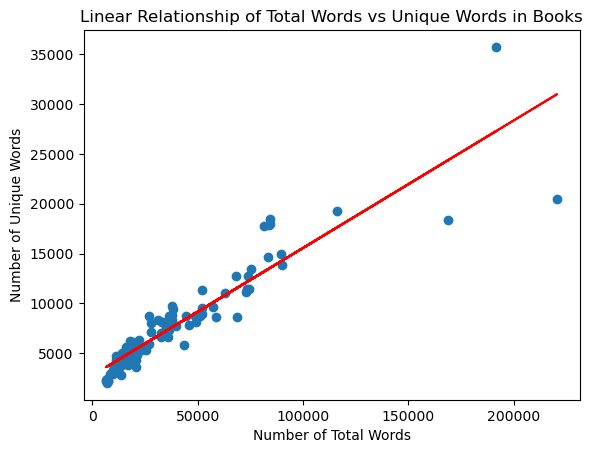

In [19]:
#visualisation of the relationship between the values
m,b = np.polyfit(tot_words, unique_words, 1) #finds the slope(m) and intercept(b) of the polynomial fit line
plt.scatter(tot_words,unique_words)
plt.plot(tot_words,m*np.array(tot_words)+b,color='red') #plots the trend line through the data

plt.title('Linear Relationship of Total Words vs Unique Words in Books')
plt.xlabel('Number of Total Words')
plt.ylabel('Number of Unique Words')
plt.show()

### Is there a trend in the overall sentiment of each book vs the length of the book (in # of sentences)?

It could be interesting to know if the longer (or shorter) a book goes on for, does the book tend to be more positive or more negative. For example, shorter books such as children's books are likely to be positive, but longer books like historical non-fiction can be quite negative. Note, if genre metadata was available for the books then this question and answer could be more definitive and in-depth.

In [20]:
#lets first calculate another correlation statistic with the dataframe created in the exploratory analysis
df_sent.corr() #calculating correlation using Pandas built in correlation function

,Sentence Count,Average Sentiment
Sentence Count,1.000000,-0.192642
Average Sentiment,-0.192642,1.000000


In [21]:
#lets confirm our value above (and get a p-value) using the scipy.stats Pearsonr module
pearsonr(tot_sentences,list(sentiments.values())) #see reference [3]

(-0.19264205342710786, 0.1801396937522495)

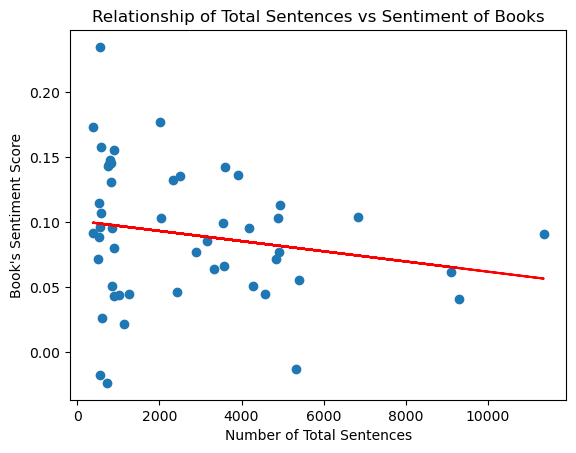

In [22]:
#plotting the found relationship (or lack thereof)
m,b = np.polyfit(tot_sentences, list(sentiments.values()), 1) #finds the slope(m) and intercept(b) of the fit line
plt.scatter(tot_sentences,list(sentiments.values()))
plt.plot(tot_sentences,m*np.array(list(tot_sentences))+b,color='red') #trend line through data

plt.title('Relationship of Total Sentences vs Sentiment of Books')
plt.xlabel('Number of Total Sentences')
plt.ylabel("Book's Sentiment Score")
plt.show()

Both of our correlation methods yielded a value of **~-0.192**, which represents a very weak negative correlation or more likely **no correlation** between book length and book average sentiment. This result is backed up by the resulting p-value of **0.18** which is **>.05** and tells us that there is in fact **no significant relationship** between the variables. 

This may have been somewhat expected, as sentiment of a book would more likely have a correlation with genre rather than length, but the genre data was unavailable. It would have been interesting to also redo this question using the relationship between genre and book length, that is where my question came from. Clearly, based on the results for this question, book length-genre-sentiment is not a transferable correlation method between variables. 

### Question 3. What is the average title length of the 10 most frequent authors in the dataset?

It would be interesting to find out if the most published authors in our dataset have varying title lengths. Perhaps they are the most frequent in our dataset, and published so many books, because they have shorter or longer titles. Depending on the answer to that, we may be able to justify the saying "never judge a book by its cover."

In [23]:
#re-printing our top 10 most frequent authors and the amount of books they have in the dataset
for i in range(10):
    print(f'{top10_names[i]}:{top10[i]}')

Various:201
W.W. Jacobs:52
Anonymous:30
Roger McGuinn:30
John Lord:14
Charles Kingsley:14
Unknown:11
James D. Richardson:8
Richard Le Gallienne:7
Arthur Schopenhauer:7


In [24]:
#collecting a list of the files for each of our top 10 authors
#most of this code is copied from when the feature was initially loaded in Part 1
file_list = []
for filename in os.listdir(path):
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
            for i in file:
                if 'Author: ' in i:
                    author_name = i[7:].strip()
                    if author_name in top10_names: #selects only files that are by the top 10 authors
                        file_list.append(filename)   
file_list[:5]

['11465.txt', '11471.txt', '11459.txt', '10035.txt', '10784.txt']

In [25]:
#making a dictionary out of the .txt files above and their title/title lengths
#most of this code is copied from when the feature was initially loaded in Part 1
titles_dct = {}
for filename in file_list:
    with open(filename,encoding="utf8", errors='ignore') as fid:
        file = fid.readlines()
        for i in file:
                if 'Title:' in i:
                    title = i[6:].strip().replace(' ','') #remove white spaces
                    titles_dct[filename] = [title,len(title)] #append each text's title and its length to dict
titles_dct['11465.txt']

['AtlanticMonthly,Volume6,No.38,December,1860', 43]

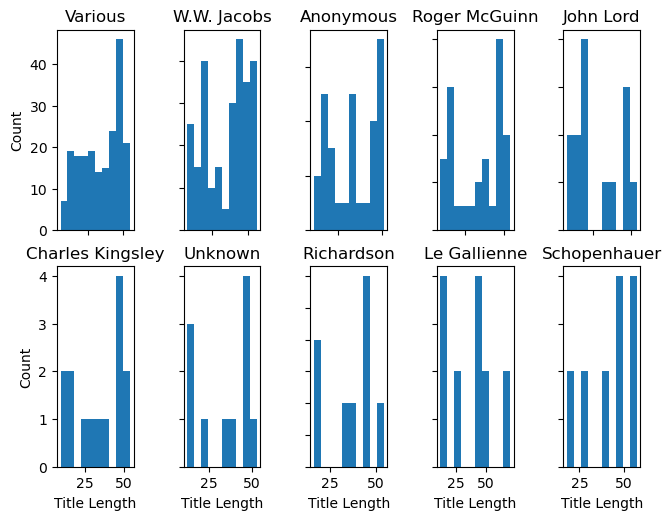

In [26]:
#now lets visualize each author's title lengths by plotting histograms
#the first block of code below finds each title length by author
value_lst = []
top10_edit = [0, 201, 52, 30, 30, 14, 14, 11, 8, 7, 7] #added a zero at the front for indexing in the loop
rolling_sum = np.cumsum(top10_edit) #finds cumulative sum for indexing in loop
for i in range(1,11):
    various_vals = list(titles_dct.values())[rolling_sum[i-1]:rolling_sum[i]] #indexing through titles dict
    value_lst.append([j[1] for j in various_vals])
    
fig, axs = plt.subplots(2, 5) #sets a 2 by 5 grid so the plots don't take up too much room
fig.tight_layout(pad=.5) #sets a bit of whitespace between the plots so titles fit better

axs[0, 0].hist(value_lst[0])
axs[0, 0].set_title('Various')
axs[0, 1].hist(value_lst[1])
axs[0, 1].set_title('W.W. Jacobs')
axs[0, 2].hist(value_lst[2])
axs[0, 2].set_title('Anonymous')
axs[0, 3].hist(value_lst[3])
axs[0, 3].set_title('Roger McGuinn')
axs[0, 4].hist(value_lst[4])
axs[0, 4].set_title('John Lord')

axs[1, 0].hist(value_lst[5])
axs[1, 0].set_title('Charles Kingsley')
axs[1, 1].hist(value_lst[6])
axs[1, 1].set_title('Unknown')
axs[1, 2].hist(value_lst[7])
axs[1, 2].set_title('Richardson') #shortened so no title overlap
axs[1, 3].hist(value_lst[8])
axs[1, 3].set_title('Le Gallienne') #shortened so no title overlap
axs[1, 4].hist(value_lst[9])
axs[1, 4].set_title('Schopenhauer') #shortened so no title overlap

for ax in axs.flat:
    ax.set(xlabel='Title Length', ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer() #only outside labels
    
#see reference [4] from Bibliography for how this was implemented

In [27]:
#finding the total sums of the title lengths for each author
sums = []
top10_edit = [0, 201, 52, 30, 30, 14, 14, 11, 8, 7, 7] #added a zero at the front for indexing in the loop
rolling_sum = np.cumsum(top10_edit) #finds cumulative sum for indexing in loop
for i in range(1,11):
    various_vals = list(titles_dct.values())[rolling_sum[i-1]:rolling_sum[i]] #indexing through titles dict
    val = sum([j[1] for j in various_vals])
    sums.append(val)
sums

[6753, 1835, 975, 1004, 397, 474, 372, 296, 262, 293]

In [28]:
#finds the average title length for each of the top 10 authors
avgs = []
for i in range(10):
    avgs.append(sums[i]/top10[i])
avgs

[33.59701492537314,
 35.28846153846154,
 32.5,
 33.46666666666667,
 28.357142857142858,
 33.857142857142854,
 33.81818181818182,
 37.0,
 37.42857142857143,
 41.857142857142854]

In [29]:
#creating a displaying the dictionary of top 10 authors and their average title lengths
final_dct = {}
for i in range(10):
    final_dct[top10_names[i]] = avgs[i]
print(final_dct)
print()
print(f'The average of our average title lengths is {sum(avgs)/10}.')

{'Various': 33.59701492537314, 'W.W. Jacobs': 35.28846153846154, 'Anonymous': 32.5, 'Roger McGuinn': 33.46666666666667, 'John Lord': 28.357142857142858, 'Charles Kingsley': 33.857142857142854, 'Unknown': 33.81818181818182, 'James D. Richardson': 37.0, 'Richard Le Gallienne': 37.42857142857143, 'Arthur Schopenhauer': 41.857142857142854}

The average of our average title lengths is 34.71703249486832.


Using our final results from the cell above, their doesn't seem to be much of a difference between any of the average title lengths of the top 10 authors in the dataset. If I had taken the bottom 10 authors maybe we could see a difference in title lengths. 

Although, without making too many assumptions, the average of our average title lengths may also be an indicator of the 'ideal' title length of a book because these are the most published in the dataset.

Perhaps we can't judge a book by its cover based on these conclusions, but if an author has a title length around 34 characters long then they may be more likely to get published.

## Suggestions

**Suggestion 1:** What if the metadata on all the books included the book's genre?

This would allow me to edit my analysis of sentiment above because genre may have more of a correlation with sentiment than just length of the book. Genre may also have a correlation with book length, for example fantasy novels are longer than children's novels. If genre was included, I would implement it with a very similar approach to what I did above, extracting each book's genre into a list like how I found title or author. Then I would find the correlation between genre and sentiment as well as between genre and book length. One could find the genre if it was included by using:

In [30]:
#this code is copied from the project parts above
genres = []
for filename in os.listdir(path):
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
            for i in file: #going line by line to find the genre (should be in first ~25 lines)
                if 'Genre: ' in i:
                    genres.append(i[6:].strip()) #removing white space from beginning/end
print(f'There are {len(set(genres))} unique genres in the dataset.') #using set() to get unique genres

#note that the output of this cell is likely because of some file containing just the word 'genre'

There are 1 unique genres in the dataset.


The resulting print statement would print all unique genres and the genres list would include all genres of all the books in the dataset.

**Suggestion 2:** The dataset could have included more books of langauges other than English.

One of my initial attempts at looking for trends in the dataset was to collect the languages of all of the books. But after doing so, almost all of the books were in English. If there was a more diverse language set then we could explore any correlations between language and other metadata or other data on the texts. it could be implemented with something like below:

In [31]:
#this code is copied from the project parts above
languages = []
for filename in os.listdir(path):
    if filename != '.ipynb_checkpoints':
        with open(filename,encoding="utf8", errors='ignore') as fid:
            file = fid.readlines()
            for i in file: #going line by line to find the language (should be in first ~25 lines)
                if 'Language: ' in i:
                    languages.append(i[9:].strip()) #removing white space from beginning/end
print(f'There are {len(set(languages))} unique languages in the dataset.') #using set() to get unique languages

#the ouput of this code cell proves the lack of languages
#also note the output is not cleaned and therefore 7 may not be the actual number of unique languages

There are 7 unique languages in the dataset.


This code cell would print out almost only English as the language with the current dataset. But if the dataset was changed to include a more diverse set of languages, we could use this metadata to find correlations with book length, genre, and other data.

**Suggestion 3:** One issue with the dataset's files I mentioned before in this project was the problem finding the official beginning and ending of the books. It would have been nice if all of the books had a special line or character that signaled the official beginning and ending of the text, where "non-story" lines were excluded (i.e. book index and table of contents). That would allow for more accurate measurements such as book length and book sentiment. This would be something I can't implement and would be up to Project Gutenberg to include in their dataset, but it would be very tedious for them as well since they'd have to go one-by-one with the books. Otherwise, the format of the dataset is fairly easy to parse.

## Bibliography

[1] “How to read multiple text files from folder in Python?,” GeeksforGeeks, Feb. 01, 2021. https://www.geeksforgeeks.org/how-to-read-multiple-text-files-from-folder-in-python/

[2] “dictionary - sort values and return list of keys from dict python,” Stack Overflow. https://stackoverflow.com/questions/7340019/sort-values-and-return-list-of-keys-from-dict-python (accessed Dec. 10, 2022).

[3] “scipy.stats.pearsonr — SciPy v1.3.2 Reference Guide,” Scipy.org, 2019. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

[4] “Creating multiple subplots using plt.subplots — Matplotlib 3.4.1 documentation,” matplotlib.org. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html